# Advanced Data Analysis - week 2 plotting examples

In the advanced data analysis course, we assume basic knowledge of Python, as could be acquired by attending the *Introduction to Programming* bridging course.

This notebook includes more information on ploting with Python. The goal is to provide basic knowledge for ploting simple graphs of data. The **Data Visualization** course in the second term will address this topic in detail.

In [1]:
import pandas as pd

### Plotting data : basics

It is often useful to plot data for simpler visualization. We now introduce how to do basic plots of data using matplotlib, a standard Python library for doing graphs.

Let's start by importing matplotlib.


In [2]:
import matplotlib.pyplot as plt


Let's import the data used in week 1.

In [3]:
import os

# Let's create a PATH in a OS independent way
# File lec1-example.csv is in directory data
fileName = os.path.join( "data", "lec1-example.csv")

# Read a CSV file into a DataFrame
df = pd.read_csv(fileName)


Executing the function ```plot()``` to a DataFrame just plots numeric values, with the X axis being the index.

<Axes: >

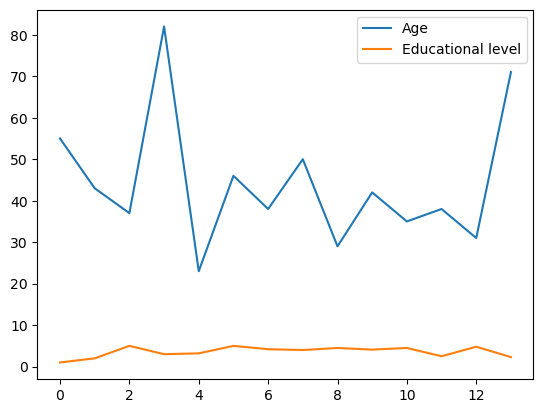

In [4]:
df.plot()


You can specify which columns should be used for the X and Y axis, by passing values for ```x```and ```y``` parameters.

<Axes: xlabel='Name'>

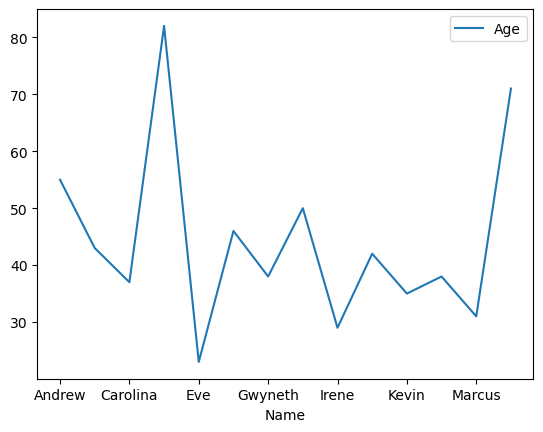

In [5]:
df.plot(x="Name",y="Age")

The following example shows two alternatives to plot a histogram for companies.

The first computes a DataFrame with the histogram values, and the second uses the built-in hist function.


<Axes: xlabel='Company'>

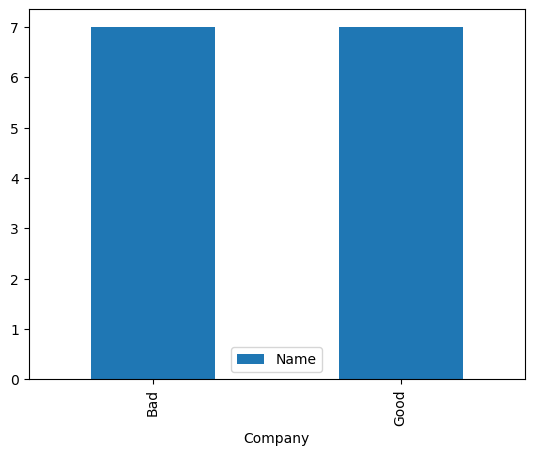

In [6]:
histDF = df[["Name","Company"]].groupby(["Company"]).count()
histDF.plot(kind="bar")

<Axes: >

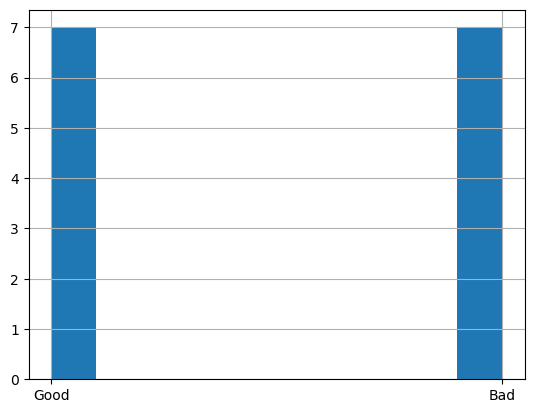

In [7]:
df["Company"].hist()

## Time-series

A time-series is a series of values that have a timestamp.

A time-series can be **Univariate** if it has a single feature (e.g. stock index, mortality, birth rate, etc.) , or **Multivariate** if it has multiple features (e.g. Weather, composed by (temperature, pressure, humidity, etc.)).



#### Example

In the examples, we will use data from COVID cases. The data files are in *data* directory, and consist of tables with 5 columns, *date*, *countrycode*, *population*, *cases*, *deaths*.

The name of the data files starts with the Internet code for the country, and has the format *CODE-covid.csv*, where CODE is the country code in uppercase.  

![table](images/table.png)

Let's read the data for Portugal. 
<!--Unlike previous examples, we will use the date as the index, by passing ```index_col``` parameter in ```read_csv```function.-->

In [8]:
ptCovidFileName = os.path.join( "data", "PT-covid.csv")

# Read a CSV file into a DataFrame
ptCovidDF = pd.read_csv(ptCovidFileName)

# Converts the date into the datetime type
ptCovidDF["date"] = pd.to_datetime(ptCovidDF["date"], format="%Y-%m-%d")


# Print the first 5 lines of data
print(ptCovidDF.head(5))


        date countrycode  population  cases  deaths
0 2020-03-02          PT    10276617      0       0
1 2020-03-03          PT    10276617      0       0
2 2020-03-04          PT    10276617      3       0
3 2020-03-05          PT    10276617      3       0
4 2020-03-06          PT    10276617      5       0


### Adding columns

Sometimes, it is intersting to add columns based on the values of the row.

For example, we may want to compute the number of cases and deaths per million inhabitants.


In [9]:
ptCovidDF["casesPer1M"] = ptCovidDF["cases"] / (ptCovidDF["population"] / 1000000)
ptCovidDF["deathsPer1M"] = ptCovidDF["deaths"] / (ptCovidDF["population"] / 1000000)

# Print the first 5 lines of data
print(ptCovidDF.head(5))

        date countrycode  population  cases  deaths  casesPer1M  deathsPer1M
0 2020-03-02          PT    10276617      0       0    0.000000          0.0
1 2020-03-03          PT    10276617      0       0    0.000000          0.0
2 2020-03-04          PT    10276617      3       0    0.291925          0.0
3 2020-03-05          PT    10276617      3       0    0.291925          0.0
4 2020-03-06          PT    10276617      5       0    0.486541          0.0


Let's plot the data, using two Y axis, specifying the columns to be used for the X and Y axis. ```secondary_y```allows to use a secondary index for the second line.

<Axes: xlabel='date'>

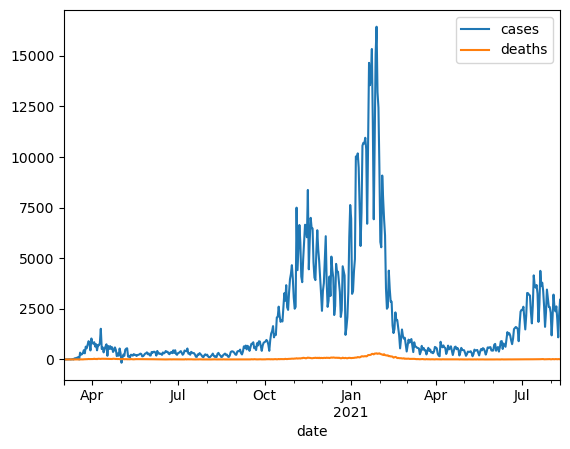

In [10]:
ptCovidDF.plot(x="date",y=["cases","deaths"])

<Axes: xlabel='date'>

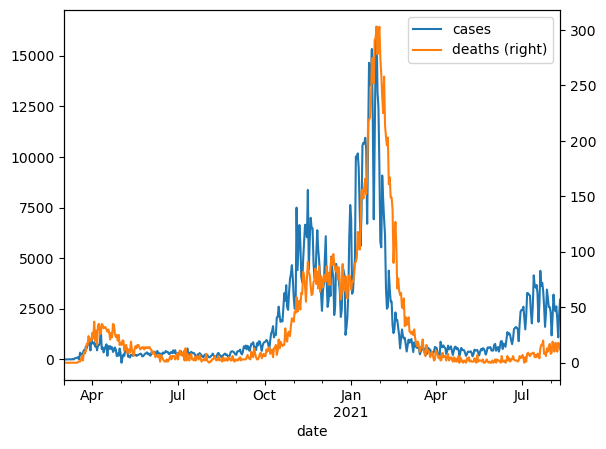

In [11]:
ptCovidDF.plot(x="date",y=["cases","deaths"],secondary_y=["deaths"])

It is also possible to use subplot to plot multiple lines, one at a time.

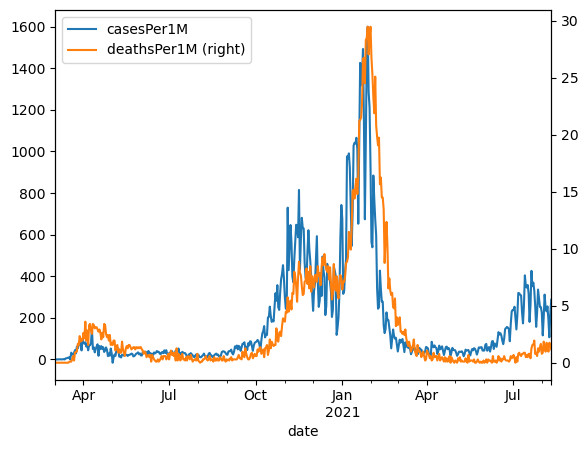

In [12]:
fig, axis = plt.subplots()
ptCovidDF.plot(ax=axis,x="date",y="casesPer1M")
ptCovidDF.plot(ax=axis,x="date",y="deathsPer1M",secondary_y="deathsPer1M")

plt.show()


### Window operations

Looking at the previous plots, the data is noisy, varying a lot from day to day. In similar cases, it is interesting to smooth the data by computing moving averages.

Add columns with the moving average and plot the data.

In [14]:
# TODO : complete
ptCovidDF["simple_MA_cases"] = ptCovidDF["cases"].rolling(7, center = False).mean()
ptCovidDF["simple_MA_deaths"] = ptCovidDF["deaths"].rolling(7, center = False).mean()
print(ptCovidDF[["cases", "deaths", "simple_MA_cases", "simple_MA_deaths"]])

     cases  deaths  simple_MA_cases  simple_MA_deaths
0        0       0              NaN               NaN
1        0       0              NaN               NaN
2        3       0              NaN               NaN
3        3       0              NaN               NaN
4        5       0              NaN               NaN
..     ...     ...              ...               ...
523   2621      17      2336.285714         13.714286
524   1982      10      2290.000000         14.000000
525   1094      18      2276.285714         15.285714
526   2232      17      2298.571429         15.000000
527   2948      12      2262.142857         14.571429

[528 rows x 4 columns]


## Exercises

### Compute the number of days for which the number of cases is larger than the average number of cases

In [27]:
# TODO : complete
cases_larger_ma = ptCovidDF[ptCovidDF["cases"] > ptCovidDF["simple_MA_cases"]]
cases_larger_ma.shape[0]

279

### Plot only the data for the days in which the number of cases is larger than the average number of cases

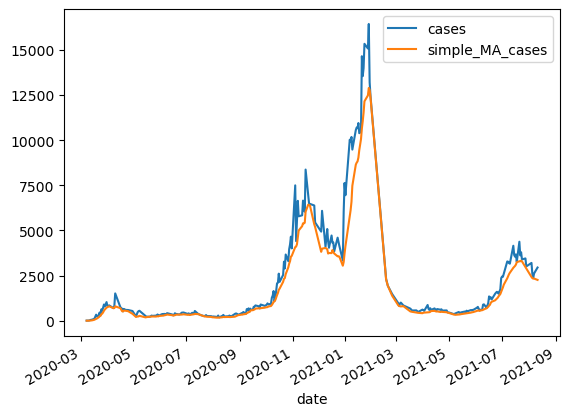

In [29]:
# TODO : complete

fig, axis = plt.subplots()
cases_larger_ma.plot(ax=axis,x="date",y="cases")
cases_larger_ma.plot(ax=axis,x="date",y="simple_MA_cases",secondary_y="deathsPer1M")

plt.show()


### Plot the cases for both Portugal and some other country in the same graph

In [30]:
# TODO : complete

ALLCovidFileName = os.path.join( "data", "ALL-covid.csv")

# Read a CSV file into a DataFrame
ALLCovidDF = pd.read_csv(ALLCovidFileName)

# Converts the date into the datetime type
ALLCovidDF["date"] = pd.to_datetime(ALLCovidDF["date"], format="%Y-%m-%d")

# Looks at the files
print(ALLCovidDF.head())
print("\n----------------\n")
print(ptCovidDF.head())


        date countrycode  population  cases  deaths
0 2020-01-25          MY    31949789      0       0
1 2020-01-26          MY    31949789      1       0
2 2020-01-27          MY    31949789      0       0
3 2020-01-28          MY    31949789      0       0
4 2020-01-29          MY    31949789      3       0

----------------

        date countrycode  population  cases  deaths  casesPer1M  deathsPer1M  \
0 2020-03-02          PT    10276617      0       0    0.000000          0.0   
1 2020-03-03          PT    10276617      0       0    0.000000          0.0   
2 2020-03-04          PT    10276617      3       0    0.291925          0.0   
3 2020-03-05          PT    10276617      3       0    0.291925          0.0   
4 2020-03-06          PT    10276617      5       0    0.486541          0.0   

   simple_MA_cases  simple_MA_deaths  
0              NaN               NaN  
1              NaN               NaN  
2              NaN               NaN  
3              NaN              

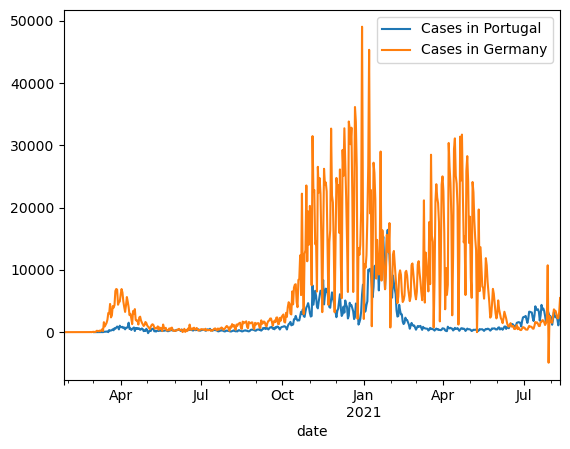

In [33]:
fig, axis = plt.subplots()
ptCovidDF.plot(ax=axis,x="date",y="cases")
ALLCovidDF[ALLCovidDF["countrycode"] == "DE"].plot(ax=axis,x="date",y="cases")

plt.legend(["Cases in Portugal", "Cases in Germany"])
plt.show()